# Importing Libraries

In [4]:
import os                   
import cv2  
import h5py
from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# % matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
# from keras.applications.resnet50 import ResNet50

In [7]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Importing 128x128 numpy image data



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
array_128x128_final = np.load("/content/drive/MyDrive/Colab Notebooks/numpy_data_CNN_128*128.npz", allow_pickle=True)


# Train-Test-Split 

In [10]:
X_train = array_128x128_final['X_train']
y_train = array_128x128_final['y_train']

In [11]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (6052, 128, 128, 3)
y_train shape: (6052,)


In [12]:
X_test = array_128x128_final['X_test']
y_test = array_128x128_final['y_test']

In [13]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (1514, 128, 128, 3)
y_test shape: (1514,)


# Plotting single image from numpy data

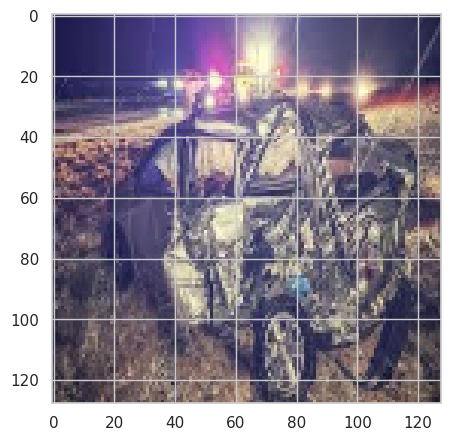

In [11]:
plt.plot(121)
img = np.reshape(X_train[1], (128,128,3))
plt.imshow(img)

# Running VGG Deep Learning model (200 Epochs)

##### Load the ImageNet VGG model. Notice we exclude the densely connected layer at the top

##### And then we add the VGG Model directly to our new model



In [13]:
NUM_EPOCHS = 100
keep_prob = 0.5
model_rate = 1-keep_prob
vggModel= tf.keras.applications.VGG16( weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model = tf.keras.models.Sequential()
model.add(vggModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=model_rate))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

print (model.summary())

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_____________________________________

##### Saving the model during training 


In [14]:
save_at = "/content/drive/MyDrive/Colab Notebooks/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

#  = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test))
H = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[save_best])


Epoch 1/100
190/190 [==============================] - 22s 64ms/step - loss: 8.1628 - accuracy: 0.4066 - val_loss: 1.0313 - val_accuracy: 0.4683
Epoch 2/100
190/190 [==============================] - 10s 50ms/step - loss: 1.0772 - accuracy: 0.4722 - val_loss: 0.9825 - val_accuracy: 0.5225
Epoch 3/100
190/190 [==============================] - 10s 54ms/step - loss: 0.9795 - accuracy: 0.5111 - val_loss: 1.1165 - val_accuracy: 0.4927
Epoch 4/100
190/190 [==============================] - 11s 58ms/step - loss: 0.9308 - accuracy: 0.5157 - val_loss: 0.9575 - val_accuracy: 0.5456
Epoch 5/100
190/190 [==============================] - 11s 55ms/step - loss: 0.9185 - accuracy: 0.5415 - val_loss: 1.1586 - val_accuracy: 0.5482
Epoch 6/100
190/190 [==============================] - 11s 55ms/step - loss: 0.8749 - accuracy: 0.5679 - val_loss: 0.9855 - val_accuracy: 0.6024
Epoch 7/100
190/190 [==============================] - 10s 50ms/step - loss: 0.8472 - accuracy: 0.5823 - val_loss: 0.8830 - val_ac

# Running model on Test Set

In [16]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.hdf5')
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  70.08 %


In [17]:
y_test

array([2, 1, 1, ..., 1, 2, 1])

In [18]:
encoder = LabelEncoder()
Targets = encoder.fit_transform(y_test)
Targets
Targets.shape

(1514,)

48/48 [==============================] - 2s 41ms/step


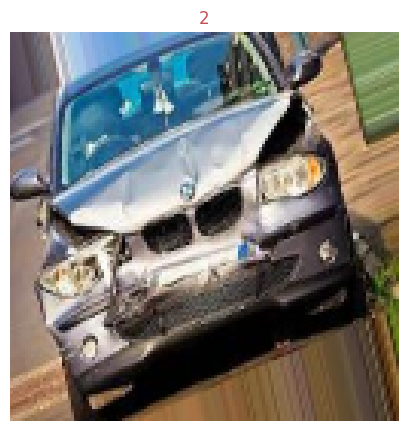

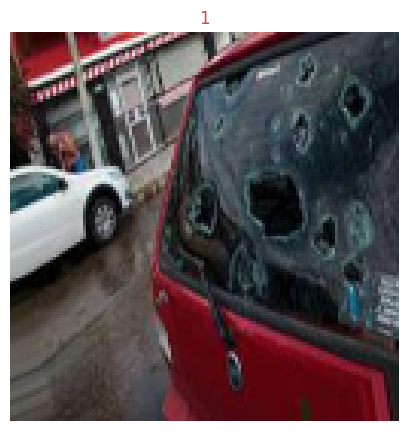

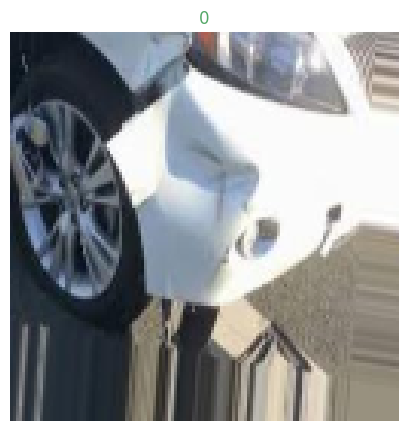

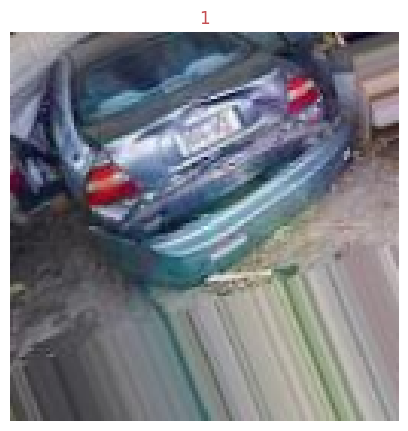

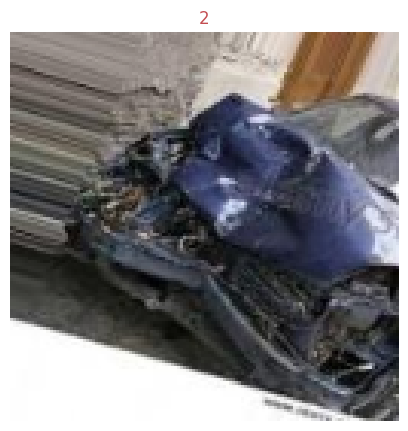

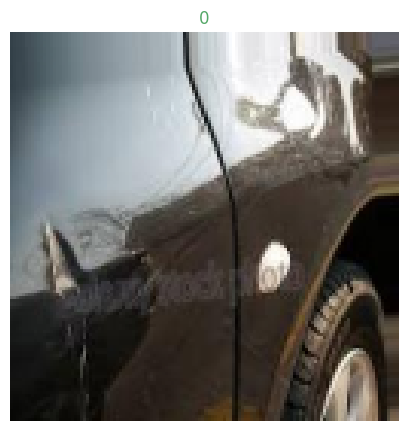

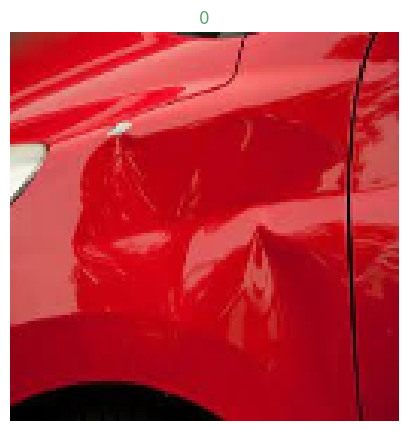

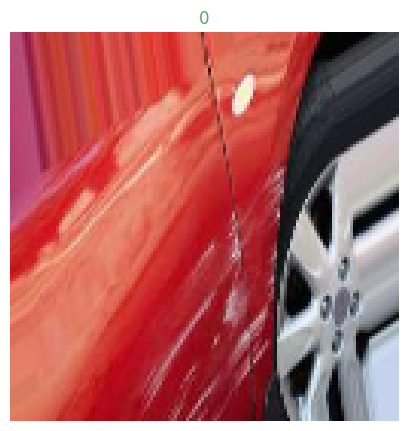

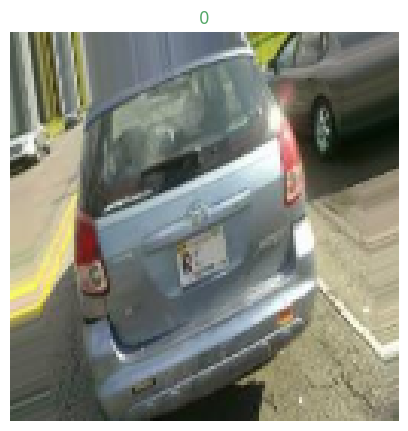

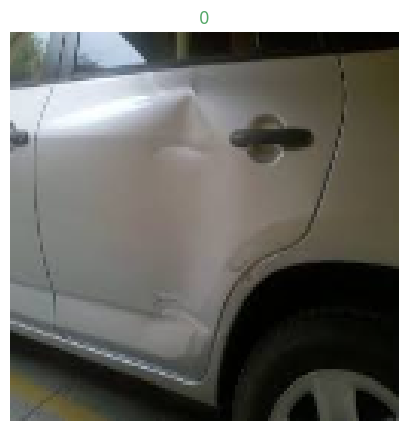

In [19]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(y_test), 10):
  plt.figure()
  plt.imshow(X_test[rand_num]), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

# Plotting Training/Validation Accuracy and Loss

In [20]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=4)

Epoch 1/50
1362/1362 [==============================] - 20s 14ms/step - loss: 2.0293 - accuracy: 0.4420 - val_loss: 1.0579 - val_accuracy: 0.3861
Epoch 2/50
1362/1362 [==============================] - 18s 13ms/step - loss: 1.1489 - accuracy: 0.3564 - val_loss: 1.0574 - val_accuracy: 0.3911
Epoch 3/50
1362/1362 [==============================] - 18s 13ms/step - loss: 1.7647 - accuracy: 0.3527 - val_loss: 1.1216 - val_accuracy: 0.3746
Epoch 4/50
1362/1362 [==============================] - 18s 13ms/step - loss: 19.3426 - accuracy: 0.3425 - val_loss: 1.0772 - val_accuracy: 0.3729
Epoch 5/50
1362/1362 [==============================] - 17s 13ms/step - loss: 1.1506 - accuracy: 0.3401 - val_loss: 1.0775 - val_accuracy: 0.3531
Epoch 6/50
1362/1362 [==============================] - 18s 13ms/step - loss: 1.1115 - accuracy: 0.3346 - val_loss: 1.0807 - val_accuracy: 0.3515
Epoch 7/50
1362/1362 [==============================] - 17s 13ms/step - loss: 1.0876 - accuracy: 0.3414 - val_loss: 1.0787 

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

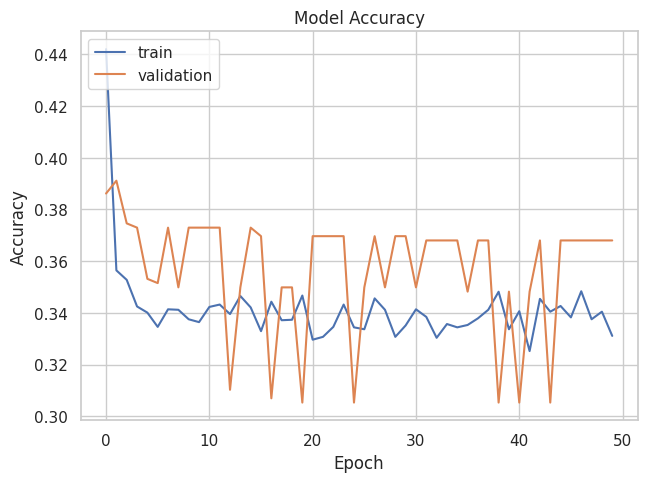

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

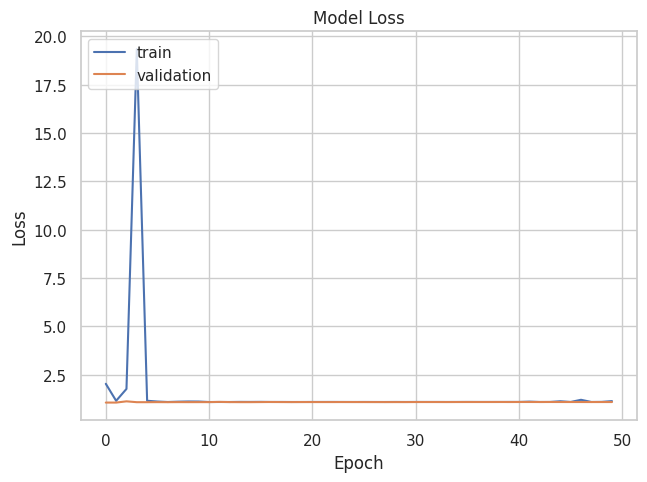

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Trying other parameters

In [18]:
from keras import regularizers, layers
from keras.callbacks import EarlyStopping


NUM_EPOCHS = 100
keep_prob = 0.5
model_rate = 1-keep_prob
vggModel= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model2 = tf.keras.models.Sequential()
model2.add(vggModel)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=model_rate))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
# model2.add(tf.keras.layers.Dense(5, activation='softmax'))

print (model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [19]:
save_at = "/content/drive/MyDrive/Colab Notebooks/model2.hdf5"
save_best = ModelCheckpoint(save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [20]:

model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])
# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# #patience early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
H2 = model2.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[es, save_best])


Epoch 1/100
190/190 [==============================] - 23s 68ms/step - loss: 7.6619 - accuracy: 0.4137 - val_loss: 1.0245 - val_accuracy: 0.4709
Epoch 2/100
190/190 [==============================] - 10s 52ms/step - loss: 1.0662 - accuracy: 0.4481 - val_loss: 1.0755 - val_accuracy: 0.4908
Epoch 3/100
190/190 [==============================] - 10s 55ms/step - loss: 1.0039 - accuracy: 0.4982 - val_loss: 2.1462 - val_accuracy: 0.5086
Epoch 4/100
190/190 [==============================] - 11s 58ms/step - loss: 0.9886 - accuracy: 0.4919 - val_loss: 0.9277 - val_accuracy: 0.5482
Epoch 5/100
190/190 [==============================] - 10s 53ms/step - loss: 0.9522 - accuracy: 0.5264 - val_loss: 0.9774 - val_accuracy: 0.5343
Epoch 6/100
190/190 [==============================] - 11s 60ms/step - loss: 0.9422 - accuracy: 0.5307 - val_loss: 0.8974 - val_accuracy: 0.5766
Epoch 7/100
190/190 [==============================] - 10s 52ms/step - loss: 0.8980 - accuracy: 0.5542 - val_loss: 0.8928 - val_ac

In [21]:
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/model2.hdf5')

# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Accuracy over the test set: \n ', round((test_acc*100), 2), '%')

Train: 0.973, Test: 0.724
Accuracy over the test set: 
  72.39 %


In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: ignored

In [16]:
from keras import regularizers, layers
from keras.callbacks import EarlyStopping

def find_best_layer_number(layer_number):
  NUM_EPOCHS = 50
  keep_prob = 0.5
  model_rate = 1-keep_prob
  vggModel= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

  vggModel.trainable= False

  model3 = tf.keras.models.Sequential()
  model3.add(vggModel)
  model3.add(tf.keras.layers.Flatten())
  model3.add(tf.keras.layers.Dense(256, activation='relu'))
  model3.add(tf.keras.layers.Dropout(rate=model_rate))
  model3.add(tf.keras.layers.Dense(layer_number, activation='softmax'))
  # model2.add(tf.keras.layers.Dense(5, activation='softmax'))

  print (model3.summary())

  save_at = "/content/drive/MyDrive/Colab Notebooks/model3.hdf5"
  save_best = ModelCheckpoint(save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])
  # simple early stopping
  # es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
  # #patience early stopping
  H3 = model3.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[save_best])

  model3 = load_model('/content/drive/MyDrive/Colab Notebooks/model3.hdf5')

  # evaluate the model
  _, train_acc = model2.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model2.evaluate(X_test, y_test, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  print('Accuracy over the test set: \n ', round((test_acc*100), 2), '%')

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


In [17]:
for i in range(1,20):
  find_best_layer_number(i)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


NameError: ignored

In [ ]:
save_at = "/content/drive/MyDrive/Colab Notebooks/model3.hdf5"
save_best = ModelCheckpoint(save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])
# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# #patience early stopping
H3 = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[save_best])


In [ ]:
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/model3.hdf5')

# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Accuracy over the test set: \n ', round((test_acc*100), 2), '%')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()